Mean Squared Error: 233111277.9133047
R-squared (R2): -1.331112779133047


C:\Users\Krishnan\AppData\Local\Temp\ipykernel_34400\1255101111.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=coefficients, palette='viridis')


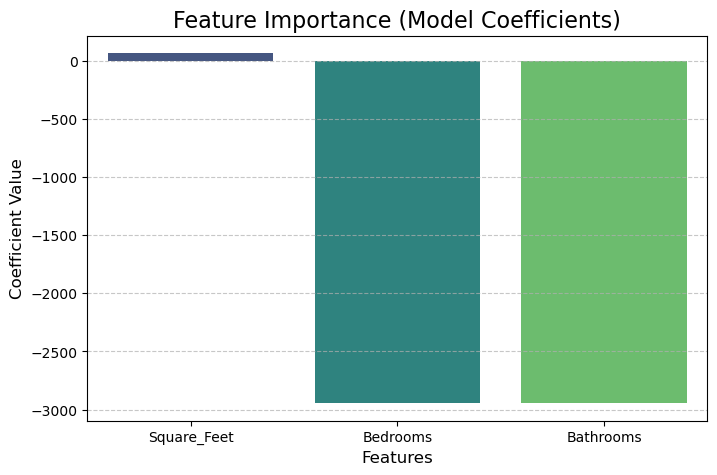

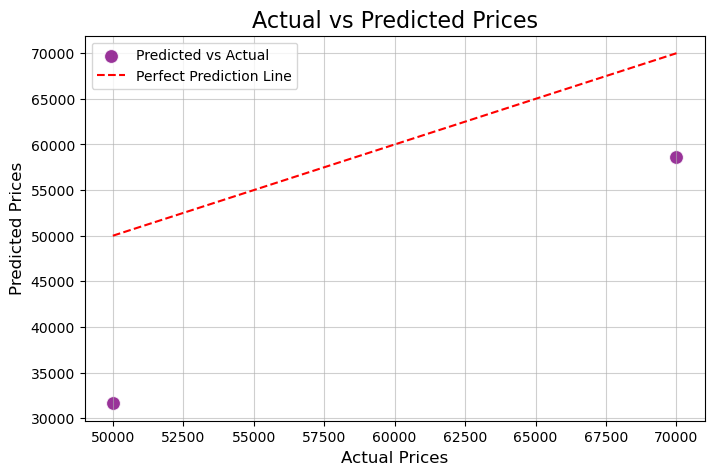

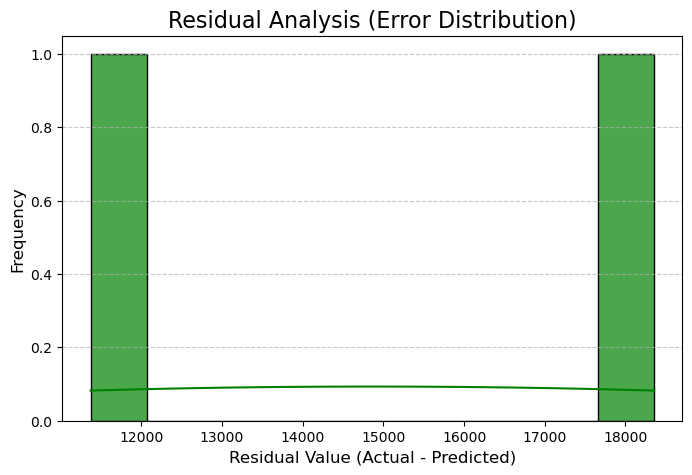

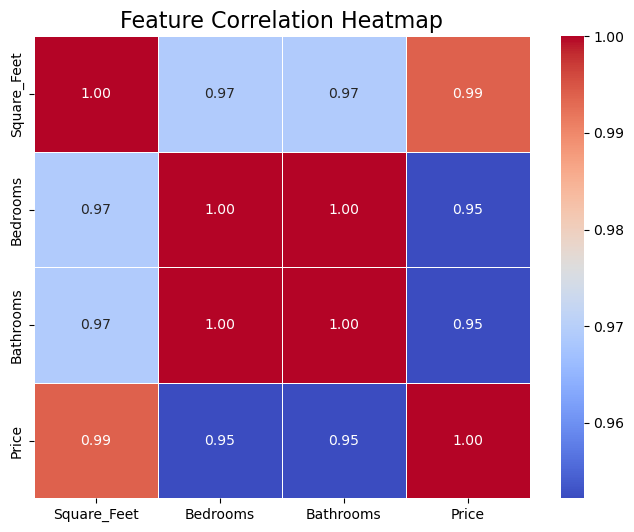

C:\Users\Krishnan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Krishnan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Krishnan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Krishnan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Krishnan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Krishnan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palet

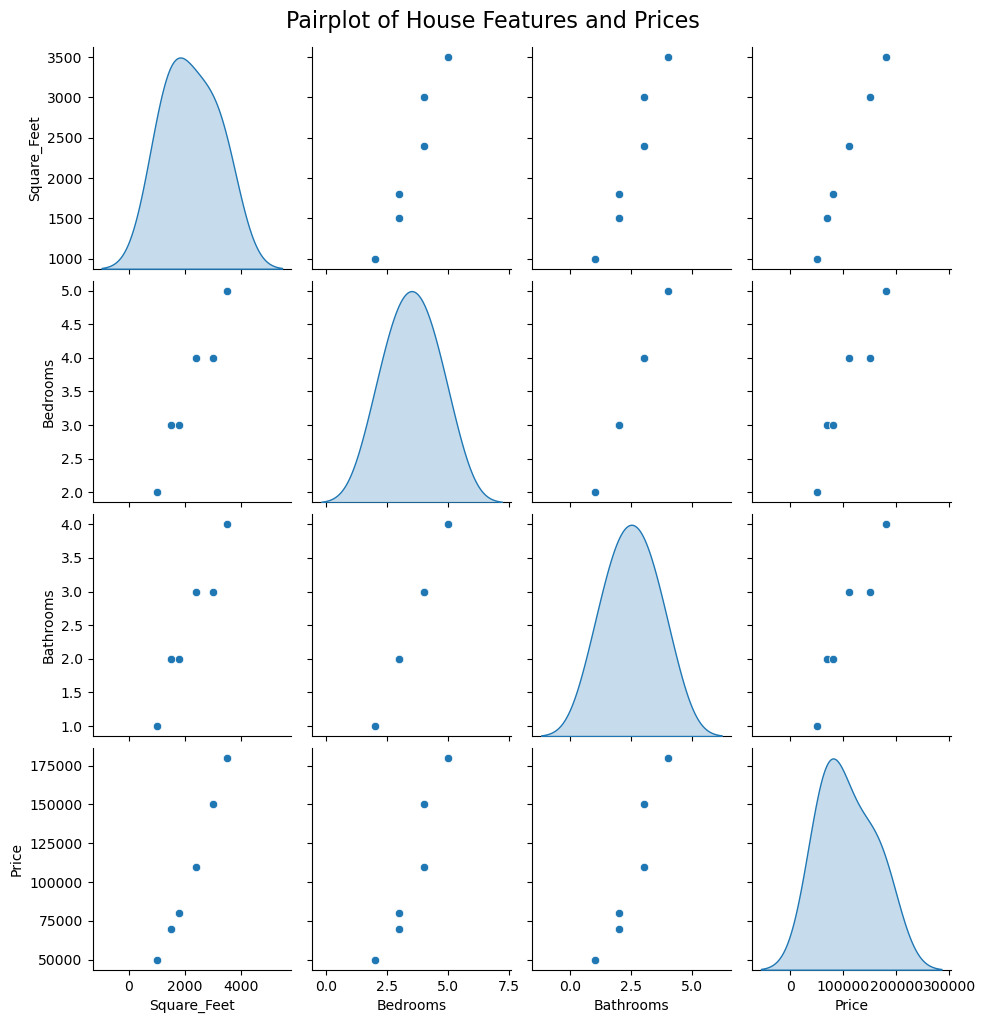

In [1]:
# Step 1: Import the necessary libraries
# Import essential libraries for data handling, model building, and visualization
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create a multi-feature dataset (House Prices)
# Simulate a dataset with house attributes and corresponding prices
data = {
    'Square_Feet': [1000, 1500, 1800, 2400, 3000, 3500],
    'Bedrooms': [2, 3, 3, 4, 4, 5],
    'Bathrooms': [1, 2, 2, 3, 3, 4],
    'Price': [50000, 70000, 80000, 110000, 150000, 180000]
}

# Step 3: Create a DataFrame
# Convert the dataset into a structured DataFrame for analysis
df = pd.DataFrame(data)

# Step 4: Define the features (X) and target (y)
# Separate the DataFrame into independent features (X) and the dependent variable (y)
X = df[['Square_Feet', 'Bedrooms', 'Bathrooms']]  # Features
y = df['Price']  # Target variable

# Step 5: Split the dataset into training and testing sets
# Use train_test_split to create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create a linear regression model
# Initialize the linear regression model
model = LinearRegression()

# Step 7: Train the model on the training data
# Fit the linear regression model using the training data
model.fit(X_train, y_train)

# Step 8: Make predictions using the model
# Use the trained model to predict the target variable for the testing set
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
# Calculate evaluation metrics for the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")

# Step 10: Visualize Feature Importance
# Retrieve model coefficients to understand the impact of each feature
coefficients = model.coef_
features = X.columns

# Colorful bar chart for feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=features, y=coefficients, palette='viridis')
plt.title('Feature Importance (Model Coefficients)', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 11: Visualize Actual vs Predicted Prices
# Scatter plot for Actual vs Predicted prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='purple', s=100, alpha=0.8, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.title('Actual vs Predicted Prices', fontsize=16)
plt.legend()
plt.grid(alpha=0.6)
plt.show()

# Step 12: Residual Analysis
# Calculate residuals to analyze prediction errors
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='green', bins=10, alpha=0.7)
plt.title('Residual Analysis (Error Distribution)', fontsize=16)
plt.xlabel('Residual Value (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 13: Heatmap of Features
# Correlation heatmap for the dataset
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

# Step 14: Pairplot Visualization
# Pairplot to show the relationships between features
sns.pairplot(df, diag_kind='kde', palette='cool')
plt.suptitle('Pairplot of House Features and Prices', y=1.02, fontsize=16)
plt.show()